# Stock Price Prediction

In [ ]:
import yfinance as yf
import pandas as pd

sp500 = yf.Ticker("^GSPC")

sp500 = sp500.history(period="max")
sp500

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-16 00:00:00-05:00,5031.129883,5038.700195,4999.520020,5005.569824,3833270000,0.0,0.0
2024-02-20 00:00:00-05:00,4989.319824,4993.709961,4955.020020,4975.509766,4034880000,0.0,0.0
2024-02-21 00:00:00-05:00,4963.029785,4983.209961,4946.000000,4981.799805,3788390000,0.0,0.0


<Axes: xlabel='Date'>

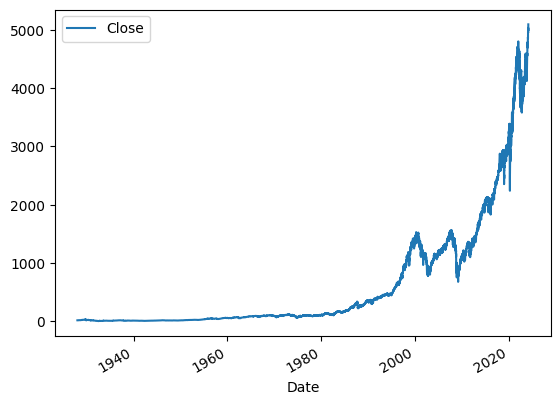

In [ ]:
sp500.plot.line(y="Close", use_index=True)

In [ ]:
# Deleting Unnecessary Columns
del sp500['Dividends']
del sp500['Stock Splits']

In [ ]:
# Adding Tomorrow column , Which will have Closing price of next day
sp500['Tomorrow'] = sp500['Close'].shift(-1)

In [ ]:
# Setting up our Target, where if in int it shows 1, that means that the price wentup, if 0 that would mean price went down.
sp500['Target'] = (sp500['Tomorrow']>sp500['Close']).astype(int)

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-02-16 00:00:00-05:00,5031.129883,5038.700195,4999.520020,5005.569824,3833270000,4975.509766,0
2024-02-20 00:00:00-05:00,4989.319824,4993.709961,4955.020020,4975.509766,4034880000,4981.799805,1
2024-02-21 00:00:00-05:00,4963.029785,4983.209961,4946.000000,4981.799805,3788390000,5087.029785,1


In [ ]:
# only taking the data from 1990, as if we take larger set of data more variability will be there. Making it harder for our model to pickup on a trend.

sp500 = sp500.loc["1990-01-01":].copy{}

In [ ]:
sp500

In [ ]:
## We will be using RandomForest Model for couple of reasons:-
# Firstly They are Very Resistant to overfitting, i.e, chances of them overfitting is very low.
# Secondly They can pickup Non linear relation between the data.

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10000,min_samples_split=100,random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ['Close', 'Volume', 'Open', 'High', 'Low']
model.fit(train[predictors], train['Target'])

In [ ]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [ ]:
import pandas as pd

preds = pd.Series(preds , index = test.index)

In [ ]:
precision_score(test["Target"], preds)

In [ ]:
combined = pd.concat([test["Target"], preds], axis =1)

In [ ]:
combined.plot()

In [ ]:
def predict(train,test,predictors,model):
  pass
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index = test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis =1)
  return combined